In [21]:
import sys
sys.dont_write_bytecode = True
%reload_ext autoreload
%autoreload 2
import Results_est as results

# LLM names
llm_models = ['ChatGPT 5.1', 'Claude Opus 4.5', 'Gemini 3 Pro']

In [22]:
# Load data
df = results.load_data(llm_models)

# Quick check (3 LLMs * 90 files * 18 smells): 4860
print(f"Total data points loaded: {len(df)}")
df.tail()

Total data points loaded: 4860


,Keelemudel,Category,File,Reegli_ID,Actual,Detected,Justification
4855,Gemini 3 Pro,Oppejoud,Vastuvotuajad_ja_opingukavad,N1.2,True,False,"No class, table, attribute, or use case names ..."
4856,Gemini 3 Pro,Oppejoud,Vastuvotuajad_ja_opingukavad,N3.1,True,True,"On the Database Design diagrams (Pages 29-32),..."
4857,Gemini 3 Pro,Oppejoud,Vastuvotuajad_ja_opingukavad,N3.2,False,False,Attributes and columns consistently start with...
4858,Gemini 3 Pro,Oppejoud,Vastuvotuajad_ja_opingukavad,N3.3,False,False,"Database table names are singular (e.g., 'Isik..."
4859,Gemini 3 Pro,Oppejoud,Vastuvotuajad_ja_opingukavad,N4.1,False,False,"No prefixes indicating type (like 'tbl_', 'str..."


#### Overall Results (All Data)

,Üldine täpsus,Täpsus,Saagis,F1-skoor,Valim,Keelemudel
0,"0,93","0,91","0,53","0,67",1620,ChatGPT 5.1
1,"0,91","0,69","0,61","0,65",1620,Claude Opus 4.5
2,"0,94","0,82","0,69","0,75",1620,Gemini 3 Pro


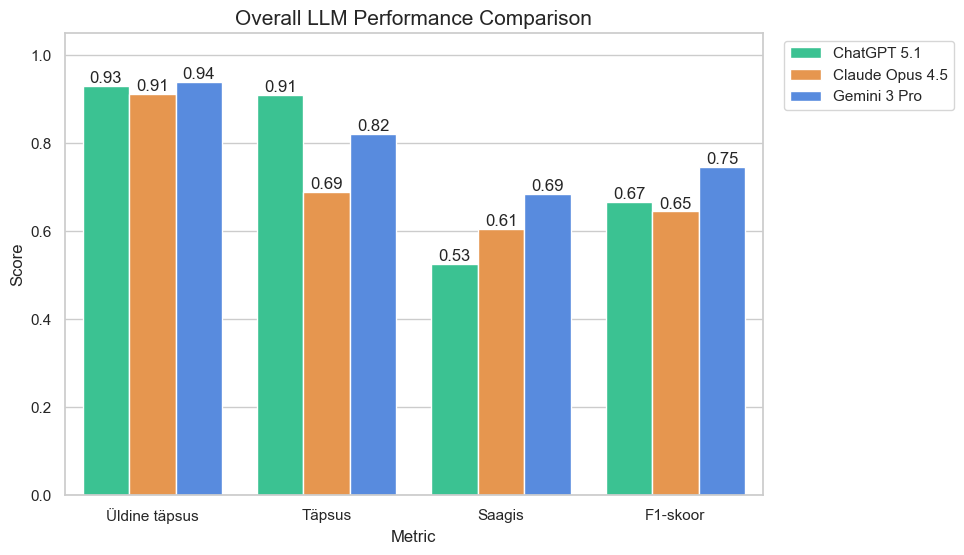

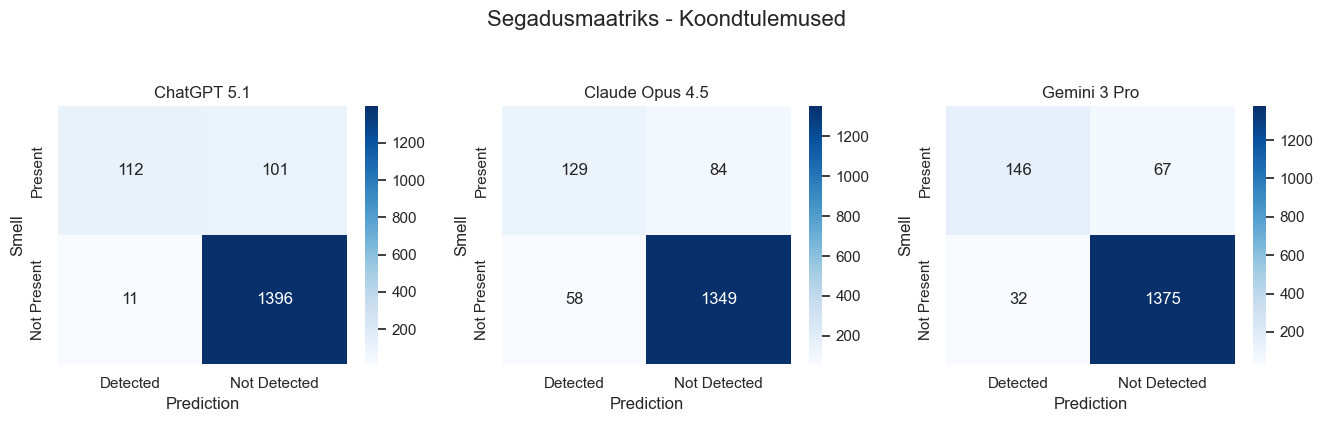

In [23]:
# 1. Calculate Metrics
overall_metrics = results.calculate_metrics(df, grouping_col='Keelemudel')

# Define a formatting function: 2 decimals, replace dot with comma
formatter = lambda x: "{:.2f}".format(x).replace(".", ",")

# Apply style to specific columns
display(overall_metrics.style.format(formatter, subset=['Üldine täpsus', 'Täpsus', 'Saagis', 'F1-skoor']))

# 2. Bar Chart Comparison
results.plot_benchmark_bars(overall_metrics, "Overall LLM Performance Comparison")

# 3. Confusion Matrices
results.plot_confusion_matrix_per_llm(df, title_prefix="Koondtulemused")

#### Aggregated Data (Synthetics vs. Real World)

 
--- Analysis for Sünteetilised andmed (Single + Multi) ---
 


,Üldine täpsus,Täpsus,Saagis,F1-skoor,Valim,Keelemudel
0,"0,96","0,93","0,51","0,66",972,ChatGPT 5.1
1,"0,94","0,64","0,59","0,61",972,Claude Opus 4.5
2,"0,95","0,73","0,60","0,66",972,Gemini 3 Pro


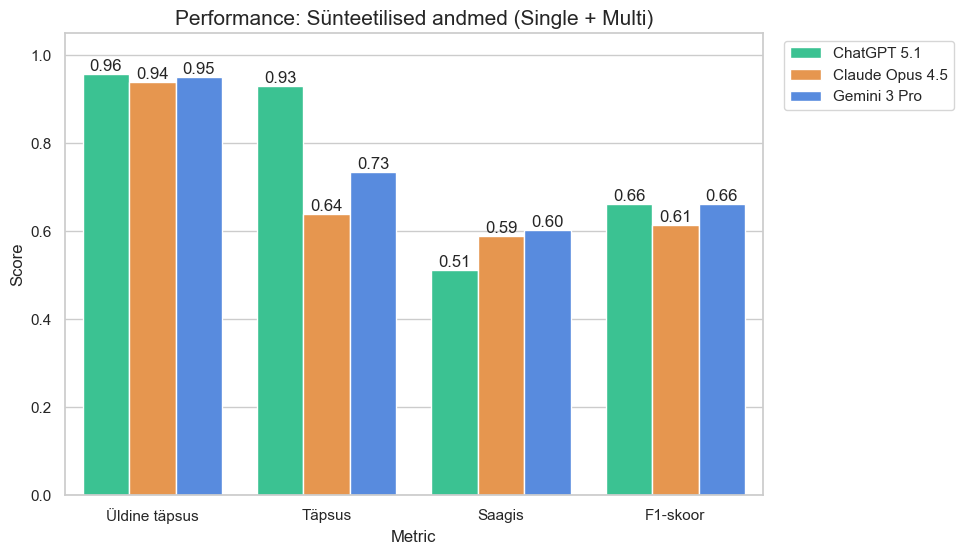

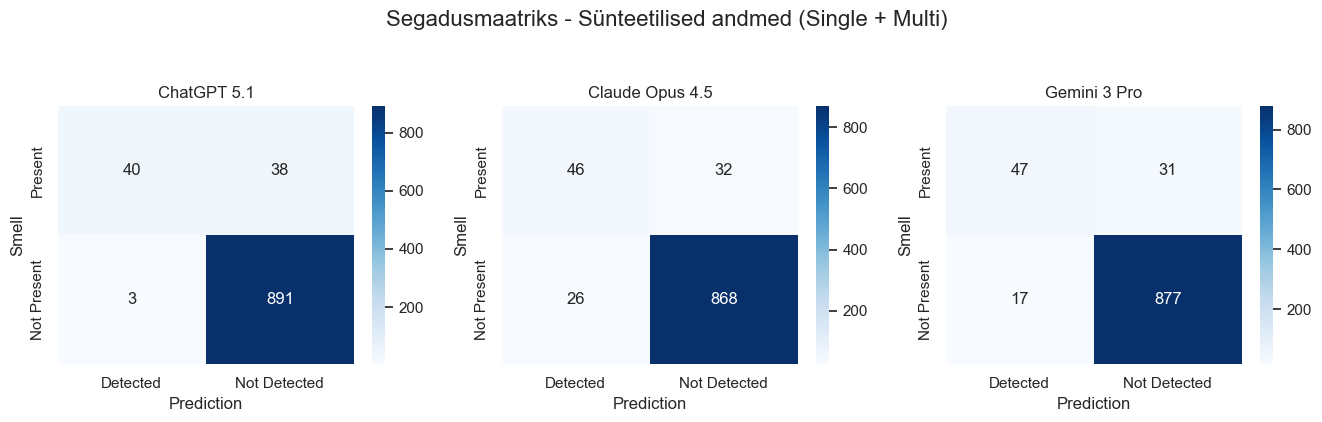

 
--- Analysis for Reaalandmed (Õppejoud + Üliõpilased) ---
 


,Üldine täpsus,Täpsus,Saagis,F1-skoor,Valim,Keelemudel
0,"0,89","0,90","0,53","0,67",648,ChatGPT 5.1
1,"0,87","0,72","0,61","0,66",648,Claude Opus 4.5
2,"0,92","0,87","0,73","0,80",648,Gemini 3 Pro


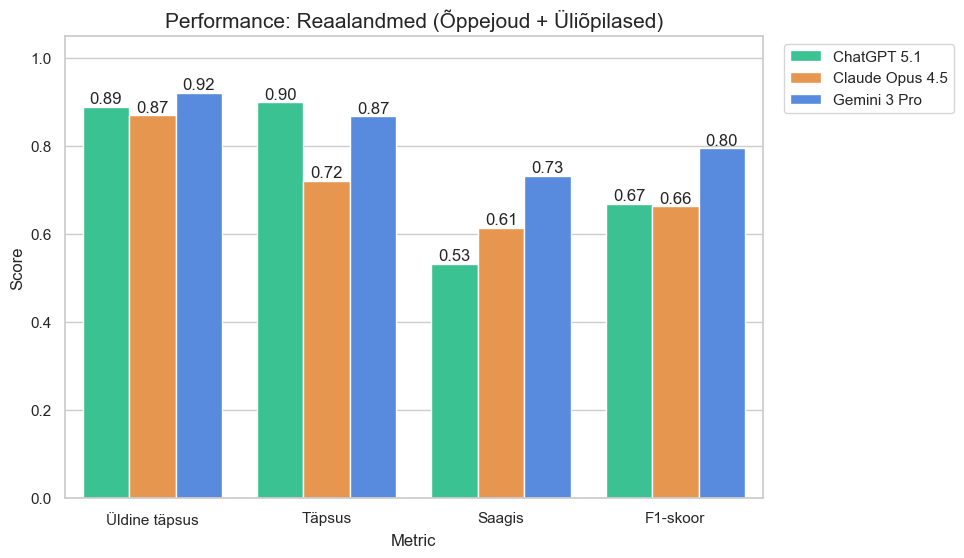

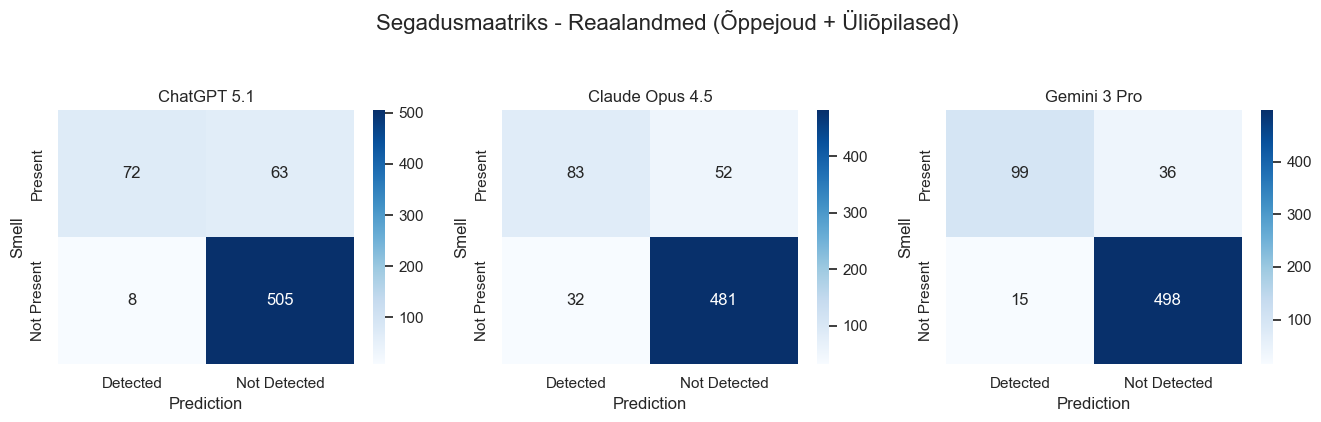

In [24]:
# Define custom groups we want to analyze
custom_aggregates = {
    "Sünteetilised andmed (Single + Multi)": ["Synthetic -> Single", "Synthetic -> Multi"],
    "Reaalandmed (Õppejoud + Üliõpilased)": ["Oppejoud", "Yliopilased"]
}

results.plot_custom_aggregates(df, custom_aggregates)

#### Results per Category (Synthetic, Oppejoud, etc.)

 
--- Analysis for Synthetic -> Single ---
 


,Üldine täpsus,Täpsus,Saagis,F1-skoor,Valim,Keelemudel
0,"0,96","0,81","0,39","0,53",594,ChatGPT 5.1
1,"0,94","0,48","0,48","0,48",594,Claude Opus 4.5
2,"0,95","0,57","0,52","0,54",594,Gemini 3 Pro


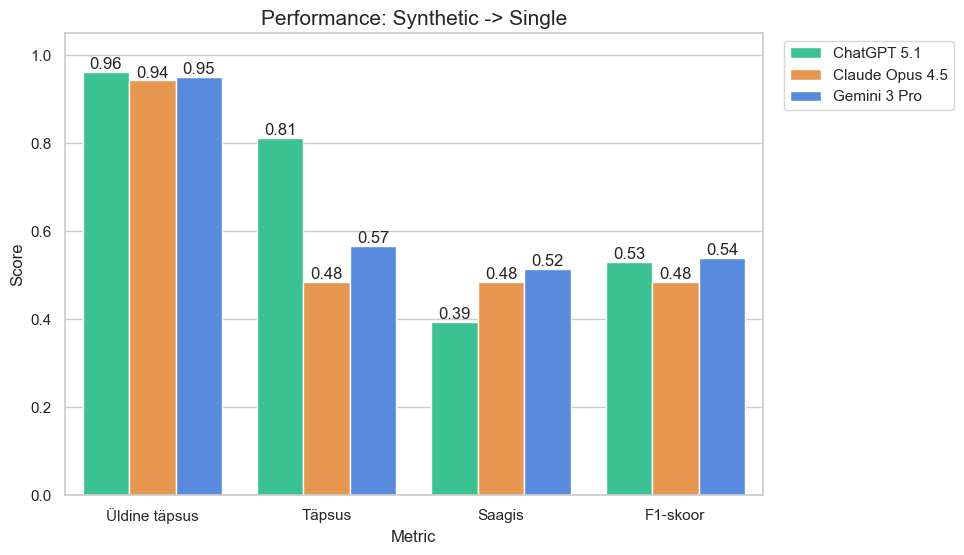

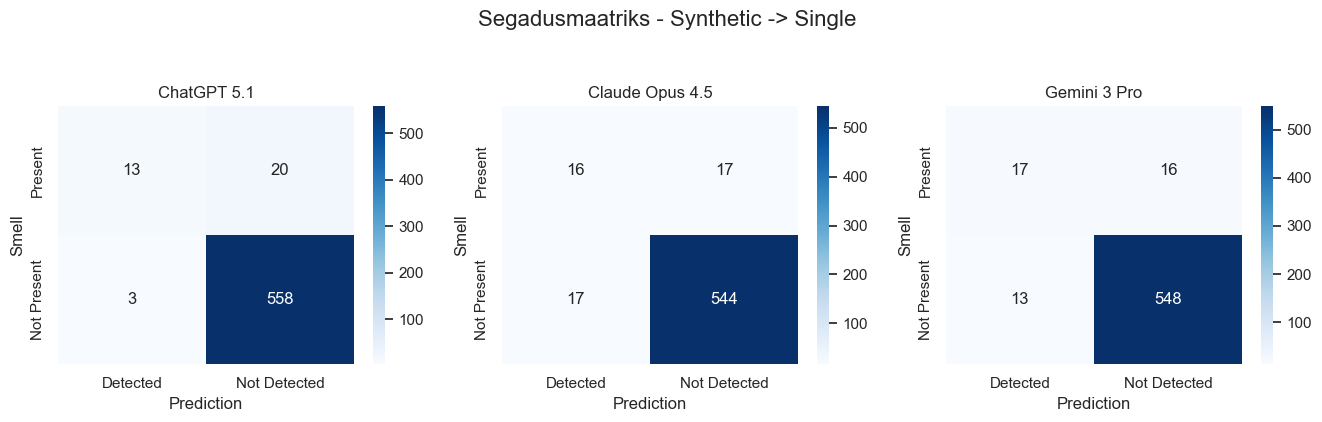

 
--- Analysis for Synthetic -> Multi ---
 


,Üldine täpsus,Täpsus,Saagis,F1-skoor,Valim,Keelemudel
0,"0,95","1,00","0,60","0,75",378,ChatGPT 5.1
1,"0,94","0,77","0,67","0,71",378,Claude Opus 4.5
2,"0,95","0,88","0,67","0,76",378,Gemini 3 Pro


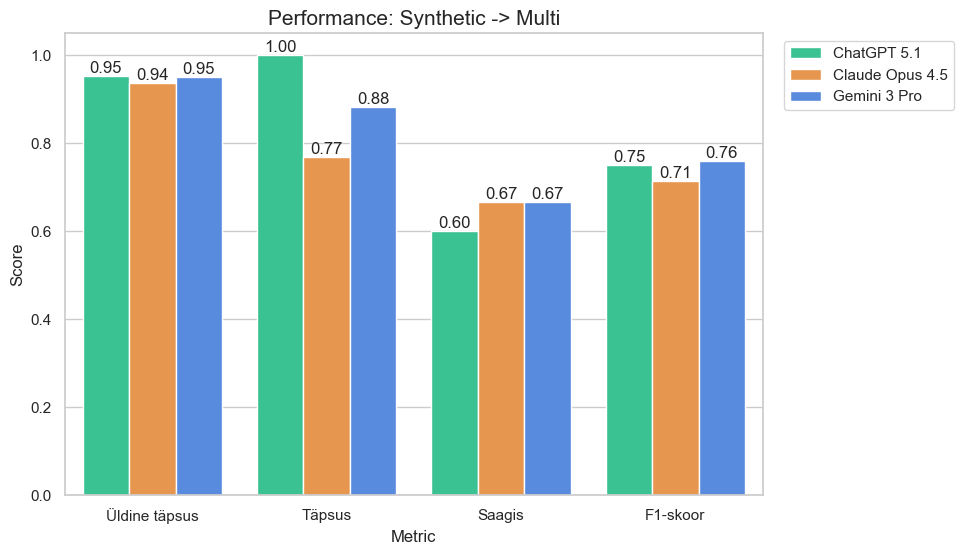

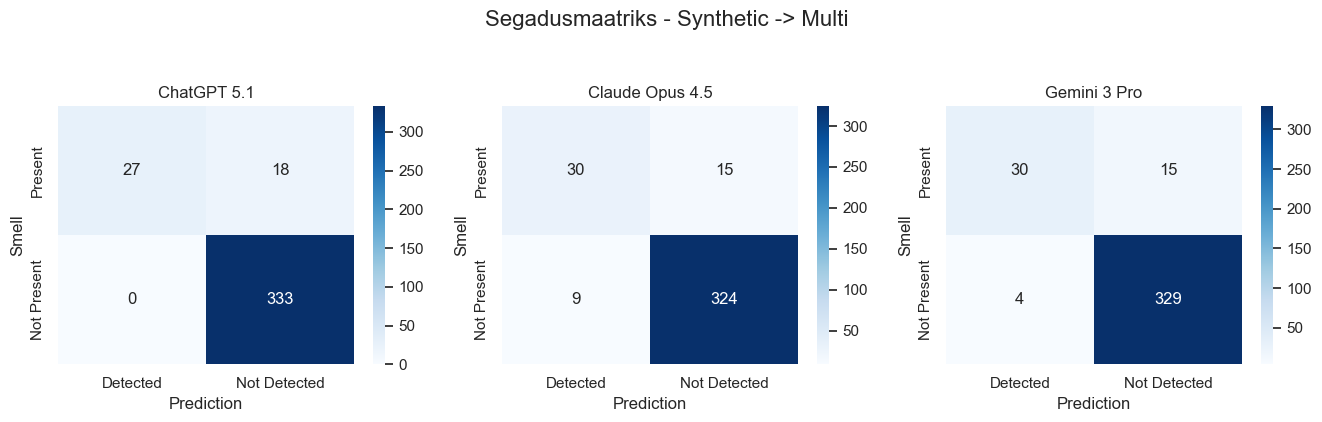

 
--- Analysis for Oppejoud ---
 


,Üldine täpsus,Täpsus,Saagis,F1-skoor,Valim,Keelemudel
0,"0,92","0,93","0,68","0,79",90,ChatGPT 5.1
1,"0,92","0,83","0,79","0,81",90,Claude Opus 4.5
2,"0,97","0,94","0,89","0,92",90,Gemini 3 Pro


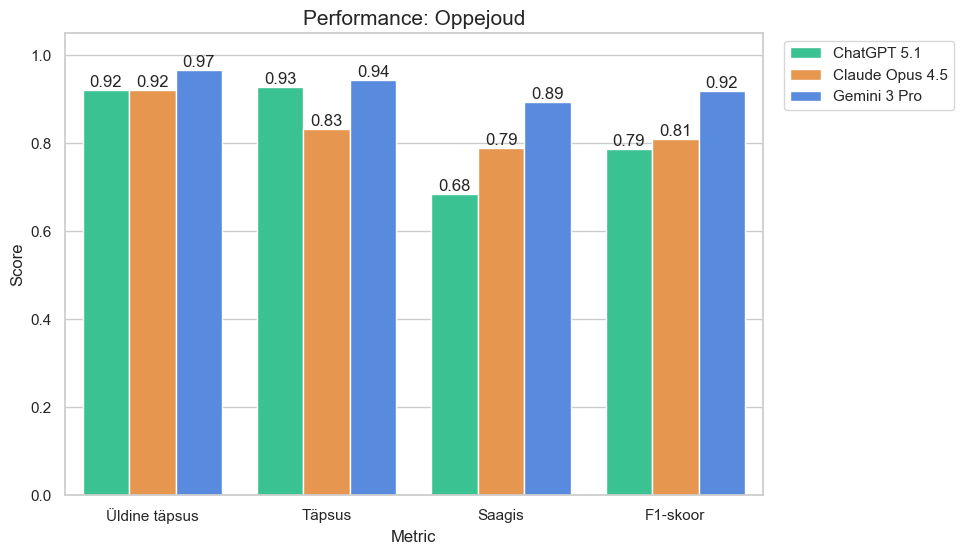

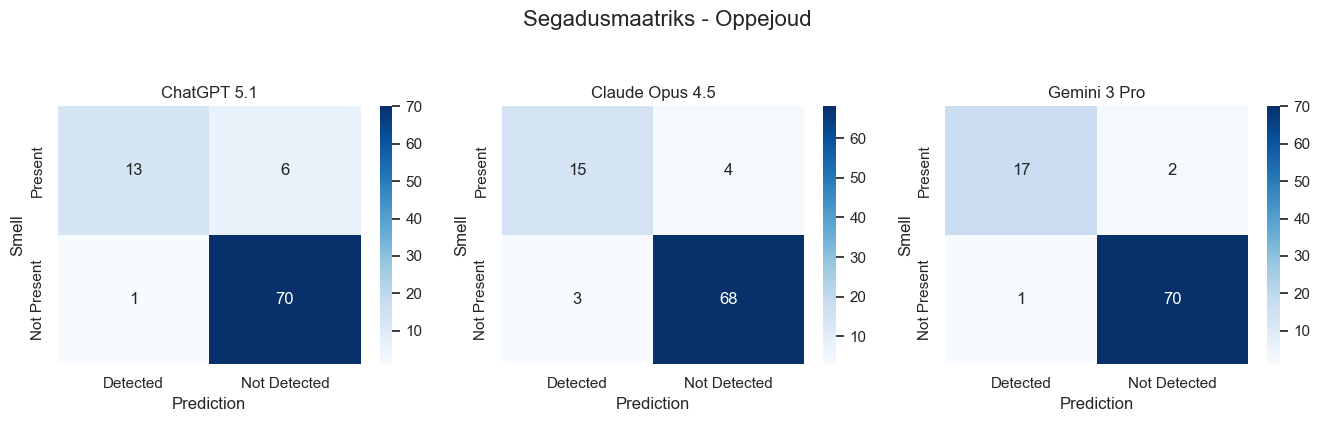

 
--- Analysis for Yliopilased ---
 


,Üldine täpsus,Täpsus,Saagis,F1-skoor,Valim,Keelemudel
0,"0,89","0,89","0,51","0,65",558,ChatGPT 5.1
1,"0,86","0,70","0,59","0,64",558,Claude Opus 4.5
2,"0,91","0,85","0,71","0,77",558,Gemini 3 Pro


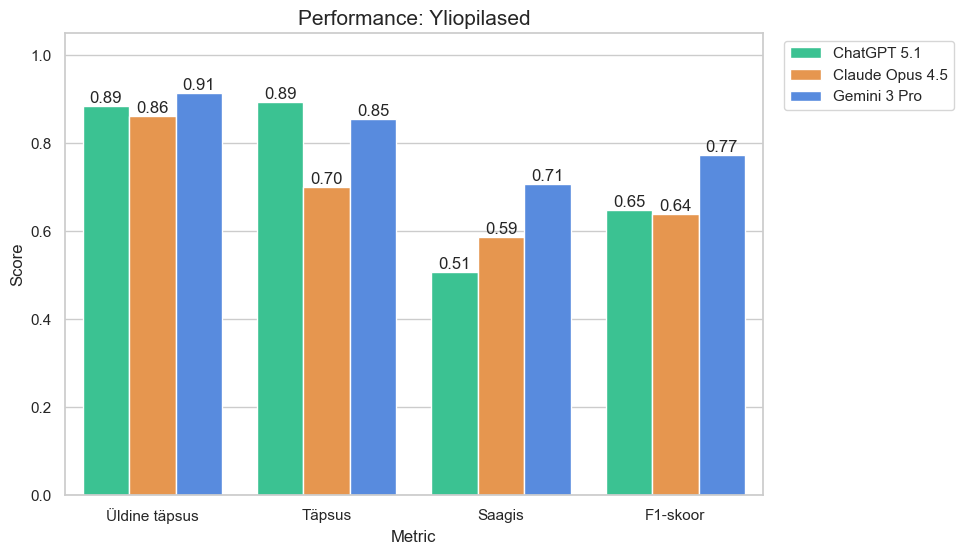

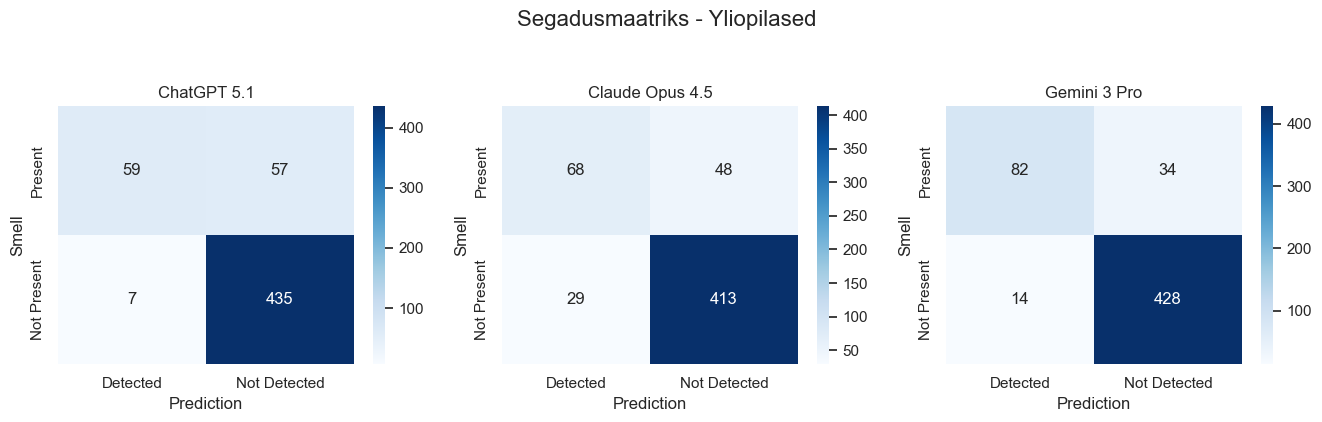

In [25]:
# Define the exact order you want
target_order = [
    "Synthetic -> Single", 
    "Synthetic -> Multi", 
    "Oppejoud", 
    "Yliopilased"
]

results.plot_per_category(df, target_order)

#### Extra: "Hallucination" Analysis
* Below graph shows how often an LLM claimed a smell existed when it did not (False Positives). Lower is better.

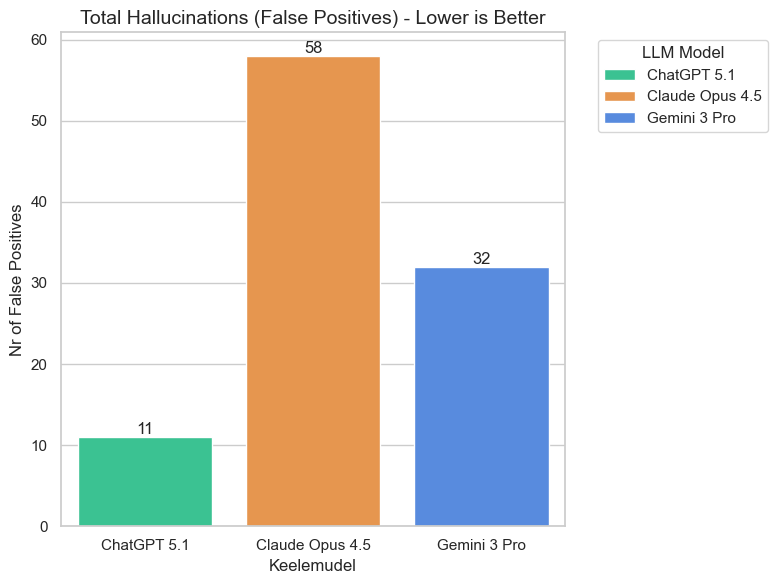

In [26]:
results.plot_hallucinations(df)

#### Extra: "Hardest Smells" Analysis
* Below graph identifies which of the 18 rules were the hardest to detect. Shown on generated Heatmap.

/Users/home/Projects/Bakatoo/Results_est.py:243: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_labels = heatmap_data.applymap(lambda x: f"{x:.2f}".replace('.', ',') if pd.notnull(x) else "")


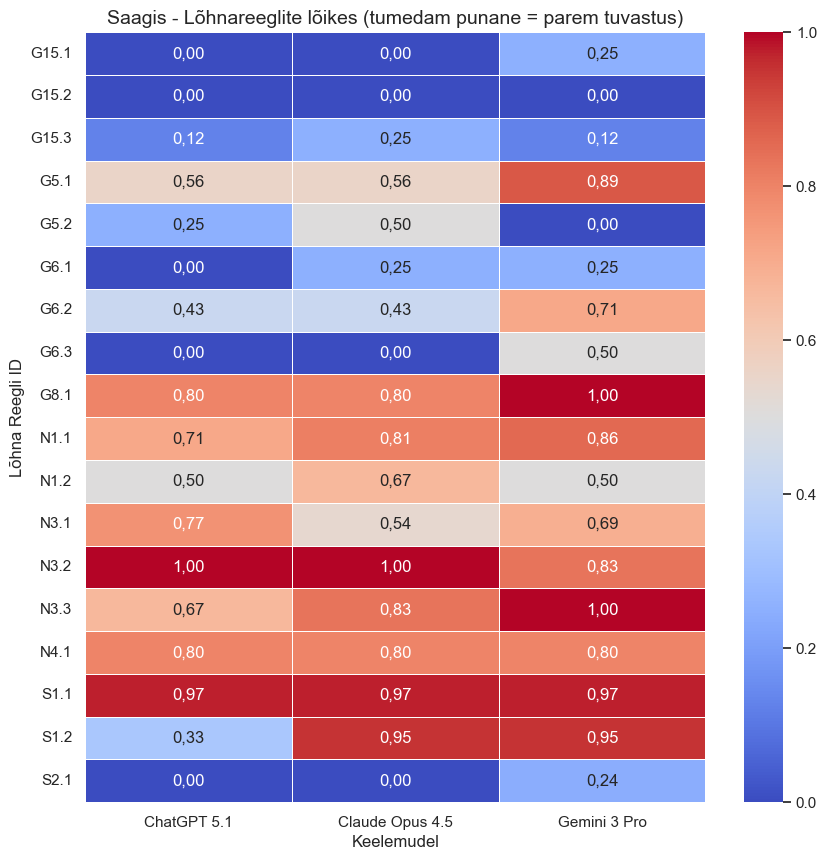

In [27]:
results.plot_hardest_smells(df)

#### The "Paranoia" Heatmap
* Below graph analyzes if an LLM is "paranoid" about specific rules. For example, it might correctly detect "God Class" (S1.1), but it might also be screaming "God Class!" on files that are actually perfectly fine.

/Users/home/Projects/Bakatoo/Results_est.py:322: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_labels = fpr_data.applymap(lambda x: f"{x:.2f}".replace('.', ',') if pd.notnull(x) else "")


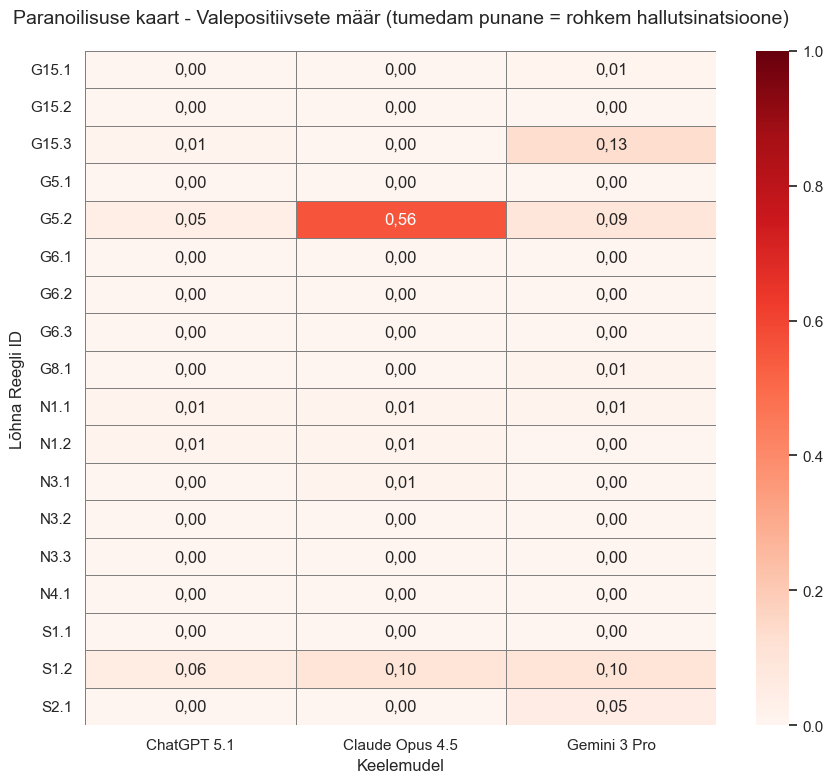

In [28]:
results.plot_paranoia_heatmap(df)

#### The Strategy Map (Precision vs. Recall)

##### Below graph plots the "Personality" of the LLM:

* Bottom Right (High Precision, Low Recall): *The "Safe Player." It only speaks when it is 100% sure. It misses a lot of real smells but rarely lies.*

* Top Left (Low Precision, High Recall): *The "Paranoid/Aggressive Player." It catches everything but hallucinates a lot.*

* Top Right: *The God Tier (Perfect).*

 
--- Analysis for All Data ---
 


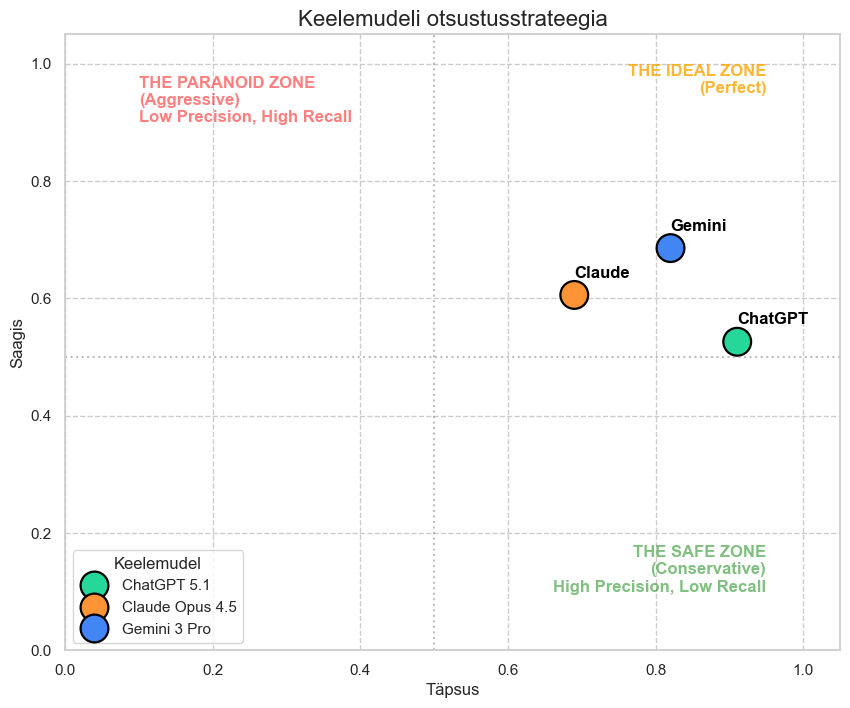

In [29]:
# Define custom groups we want to analyze
all_categories = {
    "All Data": df['Category'].unique()
}

results.plot_strategy_map(df, all_categories)

#### Analysis of LLM Strategy Map

##### Gemini (The "Best Overall" / High F1-Score)
* It achieved the best balance between coverage and trust. It proved to be the most useful tool for auditing. While it generates some false positives, its high detection rate makes it the most capable "Smell Detector" of the three.

##### ChatGPT (The "Reliable Consultant")
* It almost never "lies" to the user. However, its usefulness was limited by its "Laziness" (Low Recall). It effectively ignored nearly half of the problems in the diagrams. It is a safe tool to use, but you cannot rely on it to catch everything.

##### Claude (The Underperformer)
* It occupies an "unhappy medium": it detected fewer smells than Gemini and was significantly less trustworthy than ChatGPT. Statistically, it is strictly dominated by Gemini (which performed better in both metrics), making it the least optimal choice for this specific task.

#### The Strategy Map 2 & 3 (Precision vs. Recall)

##### Synthetics & Real World: Individual Performance

 
--- Analysis for Sünteetilised andmed (Single + Multi) ---
 


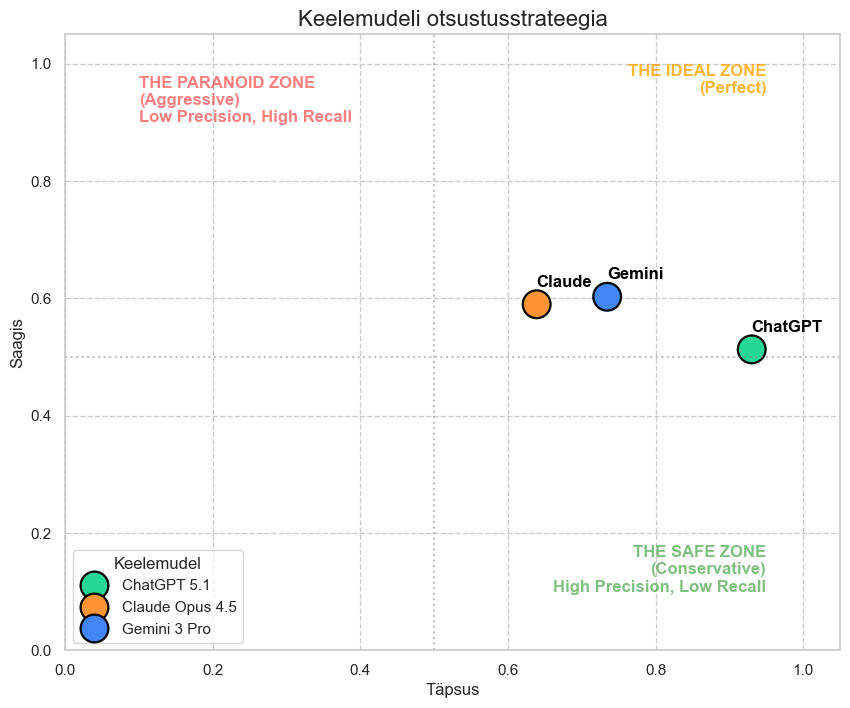

 
--- Analysis for Reaalandmed (Õppejoud + Üliõpilased) ---
 


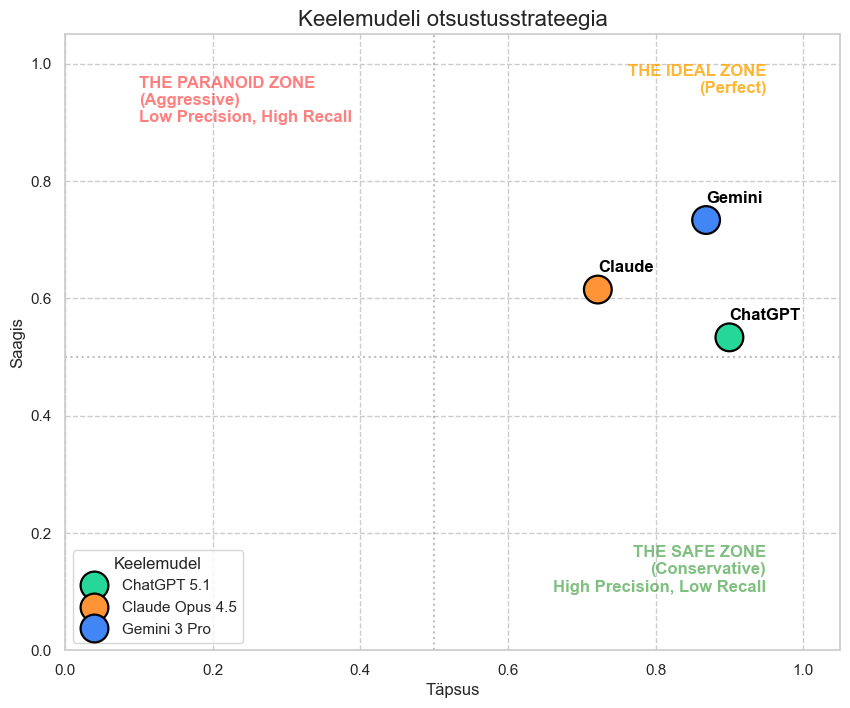

In [30]:
results.plot_strategy_map(df, custom_aggregates)